In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('511638_944030_bundle_archive/hotel_bookings.csv')
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  \
0                        0                     0       2   
1                        0                     0       2   
2                        0                     1       1   
3                        0                     1       1   
4                        0                     2       2   

            ...            deposit_type  agent company days_in_waiting_list  \
0           ...              No Deposit    NaN     NaN                    0   
1           ...              No Deposit    NaN     NaN                    0   
2           ...              No Deposit    NaN     NaN                    0   
3           ...              No Deposit  304.0     NaN                    0   
4           ...              No Deposit  240.0     NaN                    0   

  customer_type   adr  required_car_parking_spaces  total_of_special_requests  \
0     Transient   0.0                            0                          0   
1     Transient   0.0                            0                          0   
2     Transient  75.0                            0                          0   
3     Transient  75.0                            0                          0   
4     Transient  98.0                            0                          1   

   reservation_status reservation_status_date  
0           Check-Out              2015-07-01  
1           Check-Out              2015-07-01  
2           Check-Out              2015-07-02  
3           Check-Out              2015-07-02  
4           Check-Out              2015-07-03  

[5 rows x 32 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [10]:
df.customer_type.value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

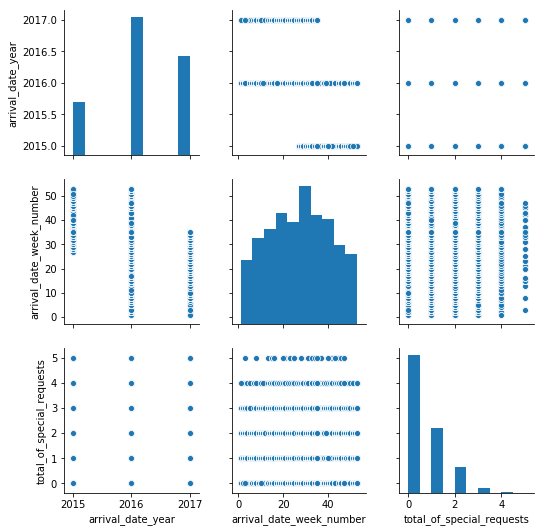

In [4]:
sns.pairplot(df, vars=['arrival_date_year','arrival_date_week_number','total_of_special_requests'])
plt.show()

c:\program files\python36\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


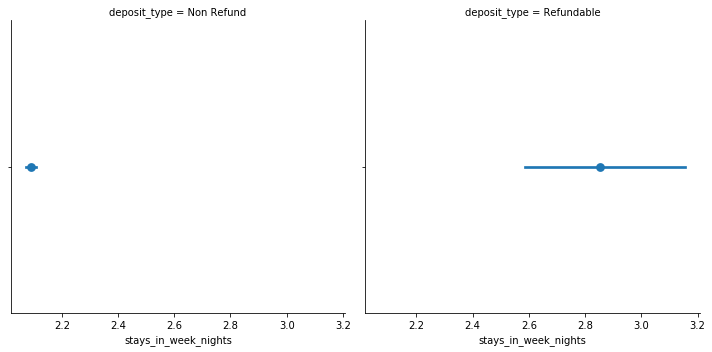

In [7]:
sns.factorplot(
    data= df,
    x = 'stays_in_week_nights',
    col = 'deposit_type',
    col_order = ['Non Refund','Refundable']
)

<Figure size 720x576 with 0 Axes>

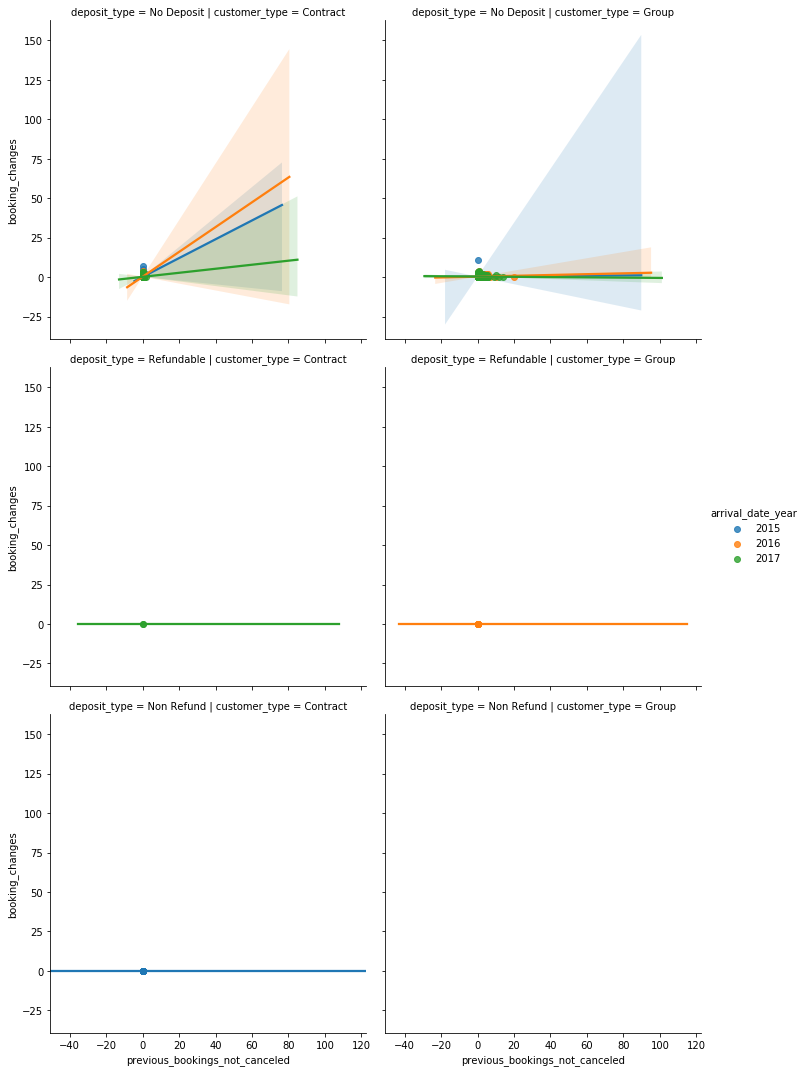

In [14]:
plt.figure(figsize=(10,8))
sns.lmplot(
    data = df,
    x = 'previous_bookings_not_canceled',
    y = 'booking_changes',
    row = 'deposit_type',
    col = 'customer_type',
    col_order = ['Contract', 'Group'],
    hue='arrival_date_year'
)